# Exercise 3: Netflix Recommendation Algorithm

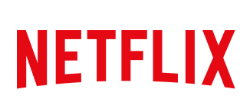

### Do not start the exercise until you fully understand the submission guidelines, which can be found herehttps://docs.google.com/document/d/1Qip08JKIppVX6dGX4hkrUCPgRmgkWYmQLEDZY_yZi90/edit?usp=sharing

#### For any material-related-questions, ask Ami.  For any organization-related-questions, ask the TA.

## Read the following instructions carefully:


1. Write your functions in this notebook only. **Do not create Python modules and import them**.
    1. Feel free to add code blocks if you need.
1. Answers to qualitative questions should be written in **markdown** cells (with $\LaTeX$ support). Answers that will be written in commented code blocks will **not** be checked.
1. Kind reminder: the total of all exercises weight is 50% of the course's grade!

## This exercise summarizes the following subjects:
1. Netflix's personal recommendations algorithm:
    1. Content Filtering
    1. Collaborative Filtering
    1. Filling missing values in the Rating Matrix
    1. Matrix Factorization
    1. Data correlation finding approaches: SVD, PCA 
1. Applications of SVD and PCA:
    1. Face images compression and recognition using PCA
    1. Hand written digits recognition using SVD/PCA
    1. Correlations detection of mutations in the genom and different populations using SVD/PCA

# Part I: Netflix's Recommendations Algorithm

We demonstrated in class how to find similar movies (and recommend movies to a user, similar to a movie he likes), using **Ratings Matrix** where a list of users partially rated a list of movies. In class, we demonstarted 2 ways to handle the Rating Matrix using Excel sheets:

1. Calculate similarities (distances) between movies using the 1 to 5 rating values.
2. Turn the Rating Matrix into a **boolean** matrix where R(i,j)=TRUE if User i rated movie j above some threshold TH (1<=TH<=5).
Note that if TH=1 we get a rating matrix where **any** rating of a movie become TRUE in the boolean rating matrix. As mentioned in class, even such elementary representation is, supresingly, good data to work with.

In [5]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Question 1 (20 points)

Write a code, based on the students' rating matrix (attatched to the homework assignment file: *our_course_ratings.csv*), to generate recommendations <ins>exactly</ins> as we demonstrated in class. That is, first translate the rating matrix to a boolean matrix using TH as a parameter in the code (use: TH=3 when you run the code. That is, ratings >= TH are marked TRUE, all other ratings, and non-ratings (zero values in the rating matrix) are FALSE. Make sure you allow to change TH to any new value from 1 to 5). Then, with the boolean rating matrix, your code will ask the user to enter a movie he liked, and present few movies that are most similar, and therefeore recommended for the user to watch.

Perform the task in the following sequence of operations.

#### 1.1 Read the Rating Matrix data (5 points)
Read the students' ratings matrix.

In [6]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################

# Fill the Rating matrix, M, with data from the CSV file.
M = pd.read_csv('our_course_ratings.csv')
TH = 3



# find avarage rating for each movie, and total avarage.

M = M.fillna(0)




#split the DF into 2 DF's, one for movies and one for rating per user and number of movies rated
M_data = M.head(2)
M = M.tail(len(M)-2)
M_T = M.transpose()
names = M_T.head(2)
movie_names = names.tail(1).values.tolist()[0]

#create a list of usernames
usernames = M.columns[2:].tolist()

#change all rating to True/false according to the value of TH.
for col in M.columns[2:]:
    M.loc[M[col]<TH , col] = False
    M.loc[M[col]>=TH , col] = True

    
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################
M


,MovieID,Movie Name,Adi Z,Adir A,Amit E,Amit N,Amit Z,Artsi S,Asif A,Ami S,...,Tamir K,Tomer F,Yoav F,Yonatan L,Yuval D,Nir D,Nir K,ClassicUser,Anim-child,Action-Fict
2,1,Avatar (2009),True,True,True,True,True,False,False,True,...,False,True,False,False,False,False,False,False,False,True
3,2,Avengers: Endgame (2019),False,False,True,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
4,3,Titanic (1997),True,False,True,True,True,True,True,False,...,False,False,True,True,True,False,False,False,False,False
5,4,Star Wars: Episode VII - The Force Awakens (2015),False,False,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
6,5,Avengers: Infinity War (2018),False,False,True,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,330,Dersu Uzala (1975),False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
332,331,Aladdin (1992),False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
333,332,The Help (2011),False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
334,333,Gandhi (1982),False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


#### 1.2 Recommendation algorithm implementation (15 points)
Implement the recommendation algorithm as we have seen in class. You can look at the excel and the calculations we did in it to create a "python version" of the algorithm.

Implement **GetUserFavoriteMovie()** :
1. Ask the user to enter a valid movieID.
1. Check it is valid (<u>do not</u> let the code crash or error if a value too high or too low or not an integer is entered by the user).
1. If it is valid user_movieID, print the user_movie_name (The complete string, as written in the excel sheet "Movie list").
1. Validate with the user this **is** the movie they liked.
1. If user changed his mind, allow him to enter **new** user_movieID and validate again in a loop until user confirms the user_movieID chosen.
1. Return the final user_movieID.

In [7]:
def GetUserFavoriteMovie() -> int:
    user_movie_name = None
    user_movieID = input("please enter movie ID ")
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    #input validation
    while True:
        try:
            user_movieID = int(user_movieID)
        except ValueError:
            print()
        if not isinstance(user_movieID,int):
            user_movieID = input("invalid input, please enter valid movie ID ")
            
        elif  user_movieID<=0 or user_movieID>M.shape[0]:
            user_movieID = input("invalid input, please enter valid movie ID ")
        else :
            user_movie_name = M.iloc[user_movieID-1,1]
            correct_movie = input("the movie you chose is "+ user_movie_name + " enter 0 if you want to change your selection, and anything else to remain with this movie.")
            if correct_movie == '0':
                user_movieID = 'a' 
            else:
                break
            
    #get movie name
    user_movie_name = M.iloc[user_movieID-1,1]  
        
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    
    print(f'The user said he likes movie #"{user_movieID}": "{user_movie_name}"')
    return user_movieID

GetUserFavoriteMovie()

please enter movie ID 123
the movie you chose is Star Wars: Episode IV - A New Hope (1977) enter 0 if you want to change your selection, and anything else to remain with this movie.ש
The user said he likes movie #"123": "Star Wars: Episode IV - A New Hope (1977)"


123


Implement **recommendation_alg()** :
1. Receive the Rating Matrix & user_movieID
1. Return $k$ other movies (not the movie they liked) recomended for him to watch. Recomended movies will be given by full name, not movie id.

In [31]:


def recommendation_alg(M, movie_id: int, k: int = 3) -> list[str]:
    '''
    Receives a movie the user likes and returns k other movies he might like.
    :param M: a ratings matrix
    :param movie_id: the id of the movie the user likes.
    :print the name of the movie id based on the movies list (it is in the same excel document the ratings are)
    :return: 3 other movies he might like, by names, not ids
    '''
    recommendations = []
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    # validation of input k.
    if not isinstance(k,int) or k<=0 or k>M.shape[0]:
        print("invalid k")
        return 0
    
    #seperating movie names from the rating matrix. movie matrix rows are movies and columns are users.
    M=M.T
    names = M.head(2)
    M=M.tail(M.shape[0]-2)
    M=M.to_numpy()
    M=M.T
    
    movie_vector = M[movie_id-1]


    
    #binary and between movie_vector and M.
    matching = np.multiply(M,movie_vector)

    
    count_voting = np.count_nonzero(matching, axis=1)

    #creating a list with the matching precentage for each movie.
    precent_match = []
    for i in range(count_voting.shape[0]):
        match_voting = count_voting[i]
        movie_votes = np.count_nonzero(movie_vector) 
        n= min(np.count_nonzero(movie_vector),np.count_nonzero(M[i]))
        if n == 0:
            precent_match.append(0)
        else:
            precent_match.append((match_voting/n ) * 100)
        
    precent_count = zip(precent_match,count_voting)
    names = names.tail(1).to_numpy()[0]
    movie_name =  names[movie_id-1]
    movie_matching = dict(zip(names,precent_count))

    #sorting the keys by the values.
    sorted_keys = sorted(movie_matching,key = lambda x: movie_matching[x][0], reverse = True)
    
    #this part is for filterring movies with less then {min_match} matching ratings. 
    counter = 0
    i=0
    min_match = 5 
    if len(sorted_keys) = 0:
        print("surry there is no mach")
        return None
    while counter != k :
        if i == len(sorted_keys):
            break 
        if movie_matching[sorted_keys[i]][1] > min_match and sorted_keys[i]!=movie_name  :
            recommendations.append(sorted_keys[i])
            counter +=1
        i+=1



    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

    assert type(recommendations) is list
    assert type(recommendations[0]) is str
    return recommendations



Implement **recommend()**:

1. Use the two earlier function you have implemented.

**Make sure first match has higher similarity score than the second one.** If it does not, <u>do not</u> submit the work, it is not working ok.

Finally, use <i>GetUserFavoriteMovie()</i> to get any movie the user likes and return k=3 other movies as a recommendation.

In [32]:
def recommend(M, k: int = 3):
    '''
    Ask a user input which is a movie the user likes and prints k other movies he might like.
    Validates user input.
    :param M: a ratings matrix
    '''
    user_movieID = -1
    user_movie = ''
    recommendations = []
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    #ask the user for his favorite movie
    user_movieID = GetUserFavoriteMovie()
    #get the k most recommended movies for him
    recommendations= recommendation_alg(M, user_movieID, k)
    
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    print(f'We recommend to watch: {recommendations}')
    


test the results using the following movieIDs (we will run it as well):

1. MovieID=15 (Harry Potter and the Deathly Hallows, Part 2).

1. MovieID=34 (Joker).

In [33]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################
k=3
#test for the recommend function
recommend(M, k)
recommend(M, k)
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

please enter movie ID 44
the movie you chose is Finding Dory (2016) enter 0 if you want to change your selection, and anything else to remain with this movie.
The user said he likes movie #"44": "Finding Dory (2016)"


IndexError: list index out of range

# TESTS

output for movie id = 15: 

please enter movie ID 15
the movie you chose is Harry Potter and the Deathly Hallows, Part 2 (2011) enter 0 if you want to change your selection, and anything else to remain with this movie.
The user said he likes movie #"15": "Harry Potter and the Deathly Hallows, Part 2 (2011)"
We recommend to watch: ['Harry Potter and the Deathly Hallows, Part 1 (2010)', 'Harry Potter and the Order of the Phoenix (2007)', 'Harry Potter and the Goblet of Fire (2005)']

output for movie id = 34:

please enter movie ID 34:
the movie you chose is Joker (2019) enter 0 if you want to change your selection, and anything else to remain with this movie.
The user said he likes movie #"34": "Joker (2019)"
We recommend to watch: ['Spider-Man: Far from Home (2019)', 'Django Unchained (2012)', 'Inglourious Basterds (2009)']

## Question 2 (40 points)

Write a code that, using **SVD** analysis of the rating matrix, does the following 3 tasks (exactly as explained in class):
1. Show X=3 movies most similar to a certain movie
1. Shows X=3 users most similar to a certain user (choose yourself as the user and compare to the rest of the class to you).
1. Recommend X=3 movies to a user based on the vector representing the user preferences in martix $V^T$ and the movies data in matrix $U$.


You can look at the following implementations of SVD analysis to make sure your write the SVD analysis right. Note that the code in these links do **not** do exactly what you are asked to do here. You need to write your own code.

1. https://analyticsindiamag.com/singular-value-decomposition-svd-application-recommender-system/

1. https://www.section.io/engineering-education/singular-value-decomposition-in-python/

### 2.1 Using SVD to calculate values in the original rating matrix M (5 points)
1. Make sure you use $M$ correctly. $M$ should have **users** as its **colomns** and **movies** as its **raws**.
1. Perform SVD on the ratings matrix, $M$. Remember: $U, S, V = np.linalg.svd(M)$ is a built-in function in python.
1. Calculate and print column i=1 of $M, M[i]$ using $U, S, V$. 
1. Calculate and print row j=15 of $M$ using $U, S, V$.

If your prints are **not** _excactly_ the same as the original rating matrix column and row, do **not** proceed. Check your code and fix it.

In [282]:
# Calculated the SVD decomposition of the original rating matrix M.
# Make sure the matrix M you work with has for columns the ratings of the users,
# i.e. column i has all the ratings of a specific user i for the movies he rated.

#pre-proccess the ratings file
M = pd.read_csv('our_course_ratings.csv')
M = M.fillna(0)
M = M.tail(M.shape[0]-2)
M = M.transpose()
M = M.tail(M.shape[0]-2)
M= M.transpose()
M = M.values.astype('int64')


U, S, V = np.linalg.svd(M)
#create the sigma matric from the vector S.
S_padded = np.pad(np.diag(S), [(0, U.shape[0] - S.shape[0]), (0, V.shape[0] - S.shape[0])], 'constant')


def calculateSpecificRating(U, S, V, row: int, column: int):

    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################

    
    #get the specific cell in the  matrix by multiplyng the matching rows and columns.
    r=int(U[row,:] @ S @ V[:,column])
          
    # printing row=15 and column=1
    
    matrix = U @ S @ V
    matrix= matrix.astype(int)
          
    print("row 15: " , matrix[15,:])
 
    print("column 1: " , matrix[:,1])



    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    
    return(r)   # Returns the rating of user at M 'column' to movie at M 'row'
                # this MUST be exactly the value of M(row, column) but *without* having M for the calculation
    
calculateSpecificRating(U, S_padded, V, 0, 0)

row 15:  [0 0 3 0 0 0 0 3 0 0 2 4 0 0 4 0 0 0 4 0 4 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 5]
column 1:  [3 0 0 0 0 3 0 4 0 0 0 0 0 4 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 3 0 5 4 0 0 0
 5 4 0 0 5 5 2 0 0 0 0 0 5 0 0 4 0 4 0 5 0 0 0 0 0 0 4 0 4 0 0 0 0 0 3 0 0
 0 0 4 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


4

### 2.2 Implementing recommendation algorithm using k-elements of SVD analysis of the rating matrix (30 points)
Use **cutSVD()** on the matrices $U, S, V$ to keep only the 1st k-columns of $U$, first k-scalars of $S$ and 1st k-rows of $V$. The size of the cut matrices is explained in detail in the class presentation. Use $k=10$ when you run the code. Remember to keep k a parameter in the code that is assinged a value. Do **not** use a number directly in the code. 

Use the cut matrices U_cut, S_cut, V_cut to do the follwing:
1. Show X=3 movies most similar to a certain movie. If the results are not as in question #1, try to change the value of $k$ and see how if effects the results. Discuss shortly the results.
1. Shows X=3 users most similar to a certain user (choose yourself as the user and compare to the rest of the class to you). If the results are not as in question #1, try to change the value of $k$ and see how if effects the results. Discuss shortly the results.
1. Recommend X=3 movies to a user based on the vector representing the user preferences in martix $V^T$ and the movies data in matrix $U$.

**Note**: To decide how similar 2 vectors 1 by k are to each other, choose one of the metrics we saw in class:
$$MSE(x,y) = SQRT( (x_1-y_1)^2 + (x_2-y_2)^2 + … + (x_k-y_k)^2)$$
$$or$$
$$L_1(x,y) = |x_1-y_1| + |x_2-y_2| + … + |x_k-y_k|$$

In [283]:
def cutSVD(U, S, V, k):
    '''
    Receives U, S, V and k and return the cut matrices U_cut, S_cut, V_cut.
    :param U: U part of SVD
    :param S: S part of SVD
    :param V: V part of SVD
    :param k: how many parameters from the original matrices to keep
    :return: U, S, V that are cut to the desired size
    '''
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    #validation for input k 
    if not isinstance(k,int) or k<=0 or k>V.shape[0]:
        print("invalid k")
        return 0
    
    #cutting the matrices.
    U_cut = U[:,:k]
    S_cut = S[:k]
    V_cut = V[:k,:]
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return U_cut, S_cut, V_cut


# setting k to 10, and creating the cuts.
k=10
U_cut,S_cut, V_cut =  cutSVD(U, S, V, k)

In [284]:
def dist(x, y) -> float:
    '''
    Calculate the similarity of 2 movies/users.
    :param x: movies/users
    :param y: movies/users
    :return: distance / similarity score
    '''
    d = 0
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    
    d= float(np.linalg.norm(x-y))
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    assert type(d) is float
    return d


#test for the distance function
print(dist(np.array([-1,-2,-3]), np.array([1,2,3]))) ## should print :7.483314774
print(dist(np.array([1,2,3]), np.array([1,2,3]))) ## should print :0.0
print(dist(np.array([0,0,0]), np.array([1,2,3]))) ## should print :3.741657387

7.483314773547883
0.0
3.7416573867739413


In [285]:
def similarMovies(U_cut, S_cut, V_cut, movie_id: int, x: int = 3) -> list[str]:
    '''
    Receives a movie the user likes and returns x movies he might also like.
    :param U_cut, S_cut, V_cut: the SVD presentation of the ratings matrix M,
    : after is was cut using cutSVD(U, S, V, k)
    :param movie_id: the id of the movie the user likes
    :param x: number of best results to return
    :return: X other movies he might like, by names, not ids
    '''
    recommendations = []
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    #validation for movie_id
    if not isinstance(movie_id,int) or movie_id<=0 or movie_id>U_cut.shape[0]:
        print("invalid movie_id")
        return 0
    #validation for input x
    if not isinstance(x,int) or x<=0 or x>U_cut.shape[0]:
        print("invalid x")
        return 0
    #get the row of movie_id, in U_cut
    movie_row = U_cut[movie_id-1]
    
    #fill the distance list, in index i there will be the distance from movie with id i+1 to movie with movie_id.
    distance = []
    for row in U_cut:
        distance.append(dist(movie_row, row))
    #print the name of the movie the user input.
    print("your movie is: " , movie_names[movie_id-1])
    #slice out the chosen movie_id from the movie names list
    movie_names_id = movie_names[:movie_id-1] + movie_names[movie_id:]
    #delete the distnce from movie_id to itself  
    del distance[movie_id-1]
    #create dictionary with movie name as key and distance as value
    movies_dict = dict(zip(movie_names_id, distance))
    #sort the keys (movie names), by the values (distances)
    sorted_keys = sorted(movies_dict,key = lambda x: movies_dict[x], reverse= False )
    #get the x closest movies to movie_id
    recommendations = sorted_keys[:x]
        
        
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    assert type(recommendations) is list
    assert type(recommendations[0]) is str
    return recommendations



# test with x=3, and movie id=15 ("Harry Potter and the Deathly Hallows, Part 2 (2011)")

x=3
movie_id = 15
similarMovies(U_cut, S_cut, V_cut, movie_id, x)

your movie is:  Harry Potter and the Deathly Hallows, Part 2 (2011)


['Harry Potter and the Half-Blood Prince (2009)',
 "Harry Potter and the Sorcerer's Stone (2001)",
 'Harry Potter and the Deathly Hallows, Part 1 (2010)']

In [286]:
def similarUsers(U_cut, S_cut, V_cut, user_id: int, x: int = 3) -> list[str]:
    '''
    Receives a user_id the user likes and returns x other users most similar to this user.
    :param U_cut, S_cut, V_cut: the SVD presentation of the ratings matrix M,
    : after is was cut using cutSVD(U, S, V, k)
    :param user_id: the id of the user analysed
    :param x: number of best results to return
    :return: X other users most similar to the user, by names, not ids
    '''
    recommendations = []
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    #validation for user_id
    if not isinstance(user_id,int) or user_id<=0 or user_id>V_cut.shape[1]:
        print("invalid user_id")
        return 0
    #validation for input x
    if not isinstance(x,int) or x<=0 or x>V_cut.shape[1]:
        print("invalid x")
        return 0
    
    #trasnpose of V_cut
    V_cut_T = np.transpose(V_cut)
    #get the row of user_id, in V_cut_T
    user_row = V_cut_T[user_id-1]
    
    #fill the distance list, in index i there will be the distance from movie with id i+1 to movie with movie_id.
    distance = []
    for row in V_cut_T:
        distance.append(dist(user_row, row))
        
    #print the name of the user.
    print("your user_id's name is: " , usernames[user_id-1])
    #slice out the chosen user_id from the usernames list
    usernames_id = usernames[:user_id-1] + usernames[user_id:]
    #delete the distnce from user_id to itself  
    del distance[user_id-1]
    #create dictionary with user name as key and distance as value
    user_dict = dict(zip(usernames_id, distance))
    #sort the keys (usernames), by the values (distances)
    sorted_keys = sorted(user_dict,key = lambda x: user_dict[x], reverse= False )
    #get the x closest users to user_id
    recommendations = sorted_keys[:x]
        
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    assert type(recommendations) is list
    assert type(recommendations[0]) is str
    return recommendations

#test with our user_id's, and Ami's
print(similarUsers(U_cut, S_cut, V_cut, 54, x))
print(similarUsers(U_cut, S_cut, V_cut, 52, x))
print(similarUsers(U_cut, S_cut, V_cut, 8, x))

your user_id's name is:  Yonatan L
['Itay J', 'Gal M', 'Omri K']
your user_id's name is:  Tomer F
['Lior Liv', 'Tal C', 'Dean C']
your user_id's name is:  Ami S
['Anim-child', 'Tal C', 'Gal M']


In [287]:
def SVDFullRecomendationAlgo(U_cut, S_cut, V_cut, user_id: int, x: int = 3) -> list[str]:
    '''
    Receives a user_id and returns x movies most recommended to this user
    Based on ALL the users preferences as represented in the cut-U-S-V matrices.
    :param U_cut, S_cut, V_cut: the SVD presentation of the ratings matrix M,
    : after is was cut using cutSVD(U, S, V, k)
    :param user_id: the id of the user analysed
    :param x: number of best results to return
    :return: X most recommended movies he might like, by names, not ids
    '''
    recommendations = []
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    #validation for user_id
    if not isinstance(user_id,int) or user_id<=0 or user_id>V_cut.shape[1]:
        print("invalid user_id")
        return 0
    #validation for input x
    if not isinstance(x,int) or x<=0 or x>U_cut.shape[0]:
        print("invalid x")
        return 0
    
    
    #print the name of the user.
    print("your user_id's name is: " , usernames[user_id-1])
    
    V_cut_T = np.transpose(V_cut)
    user_row = V_cut_T[user_id-1]

    movie_ranks = U_cut @ user_row
    
    movie_dict = dict(zip(movie_names, movie_ranks))
    
    sorted_keys = sorted(movie_dict,key = lambda x: movie_dict[x], reverse= True )
    
    recommendations = sorted_keys[:x] 
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    assert type(recommendations) is list
    assert type(recommendations[0]) is str
    return recommendations


#test for our's user_id's - it works 
print(SVDFullRecomendationAlgo(U_cut, S_cut, V_cut,54))
print(SVDFullRecomendationAlgo(U_cut, S_cut, V_cut,52))

your user_id's name is:  Yonatan L
['The Hobbit: An Unexpected Journey (2012)', 'The Hobbit: The Desolation of Smaug (2013)', 'The Hobbit: The Battle of the Five Armies (2014)']
your user_id's name is:  Tomer F
['The Lion King (1994)', 'The Dark Knight Rises (2012)', 'Joker (2019)']


### 2.3 Comparisings and discussion (5 points)
Submit the same ids as in 1.2 and show the results with the k-cut SVD method. Discuss the difference bewtween the outputs here and from question 1. How many values from the SVD decomposition (ie: what minimum k) gives answers as good as, or better, than the results using the code from question 1?

In [288]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################
x=3
for k in range(1,10):
    U_cut,S_cut, V_cut =  cutSVD(U, S, V, k)
    #test harry poter
    print("k = " , k, similarMovies(U_cut, S_cut, V_cut, 15, x))
    print("k = " , k, similarMovies(U_cut, S_cut, V_cut, 34, x))
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

your movie is:  Harry Potter and the Deathly Hallows, Part 2 (2011)
k =  1 ['The Lord of the Rings: The Two Towers (2002)', 'Forrest Gump (1994)', 'Avatar (2009)']
your movie is:  Joker (2019)
k =  1 ['The Lion King (1994)', 'The Matrix (1999)', 'The Lord of the Rings: The Return of the King (2003)']
your movie is:  Harry Potter and the Deathly Hallows, Part 2 (2011)
k =  2 ['Iron Man 3 (2013)', "Pirates of the Caribbean: Dead Man's Chest (2006)", 'The Lion King (2019)']
your movie is:  Joker (2019)
k =  2 ['Inception (2010)', 'Avatar (2009)', 'Harry Potter and the Deathly Hallows, Part 2 (2011)']
your movie is:  Harry Potter and the Deathly Hallows, Part 2 (2011)
k =  3 ['Iron Man 3 (2013)', 'The Lion King (2019)', 'Avatar (2009)']
your movie is:  Joker (2019)
k =  3 ["Pirates of the Caribbean: Dead Man's Chest (2006)", 'Harry Potter and the Deathly Hallows, Part 2 (2011)', 'Iron Man 3 (2013)']
your movie is:  Harry Potter and the Deathly Hallows, Part 2 (2011)
k =  4 ['Iron Man 3 (20

### conclusion
we can see that when increasing k, the outputs are getting better and better.
at k=9 the output is even better then the output of 1.2.

# Part II: Decomposing and assembling facial images using the PCA 

In the code file from class we demonstrated some things that can be done with the decomposition of a data structure of different faces using the PCA method. Specifically, we saw how to:
1. Create a face image using eigenvectors of face images (Eigenfaces) multiplies by Weights.
1. Find faces most similar to a given face image using weights comparison.
1. Morph two images by gradual shift of the weights used to construct a face image from one image's weights to the other image's weights.
1. Calculate the error of an image constucted from eigenvectors and see how it decreases (very quickly) as we add more eigenvectors.

## Question 3: Subject (40 Points)

In this question we will use the code we saw in class and add some new capabilities.

### 3.1 add a face image of yourself to the database
Add a photos of each partner in your group to the images database, and recalculate the decomposition of the entire database according to the PCA method.

**Note 1:** Take care, and few tries, to add a face image of yours that is **similar** to the other face images in the database, in the framing of the face and with exactly the same number of pixels (resolution).

**Note 2:** decomposition using the PCA method is done by calling the function that does the decomposition, you just have to understand how to add more images to the database and call the function correctly.


In [267]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################
# add image(s) to data base

#photos added as user s41, s42.
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

In [268]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################
import zipfile
import cv2
import numpy as np

faces = {}
with zipfile.ZipFile("faces_dataset.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue # not a face picture
        with facezip.open(filename) as image:
            # If we extracted files from zip, we can use cv2.imread(filename)
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)
            

faceshape = list(faces.values())[0].shape
print("Face image size:", faceshape)

classes = set(filename.split("/")[0] for filename in faces.keys())
print("Number of classes:", len(classes))
print("Number of pictures:", len(faces))

###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

Face image size: (112, 92)
Number of classes: 42
Number of pictures: 420


In [269]:
facematrix = []
facelabel = []
for key,val in faces.items():
    facematrix.append(val.flatten())
    facelabel.append(key.split("/")[0])
    
# Create facematrix as (n_samples,n_pixels) matrix
facematrix = np.array(facematrix) 

# Apply PCA to extract eigenfaces
from sklearn.decomposition import PCA
 
pca = PCA().fit(facematrix)


 


### 3.2 quality vs #PCA elements
Show improvement in face image quality as a function of the number of PCA decomposition elements used to reconstruct the face image. Plot the MSE between the source image and the image in different phases of its reconstruction as more and more eigenfaces are added to the reconstructed image. Draw two graphs:
1. A linear graph showing the error - relative to the "zero" round error (when the initail phase reconstructed image is the average image of all faces) as a function of the number of iterations.
1. A logarithmic graph on the y-axis that does the same thing.

**Note:** there is already code that draws the two graphs. You only need to calculate the MSE function.

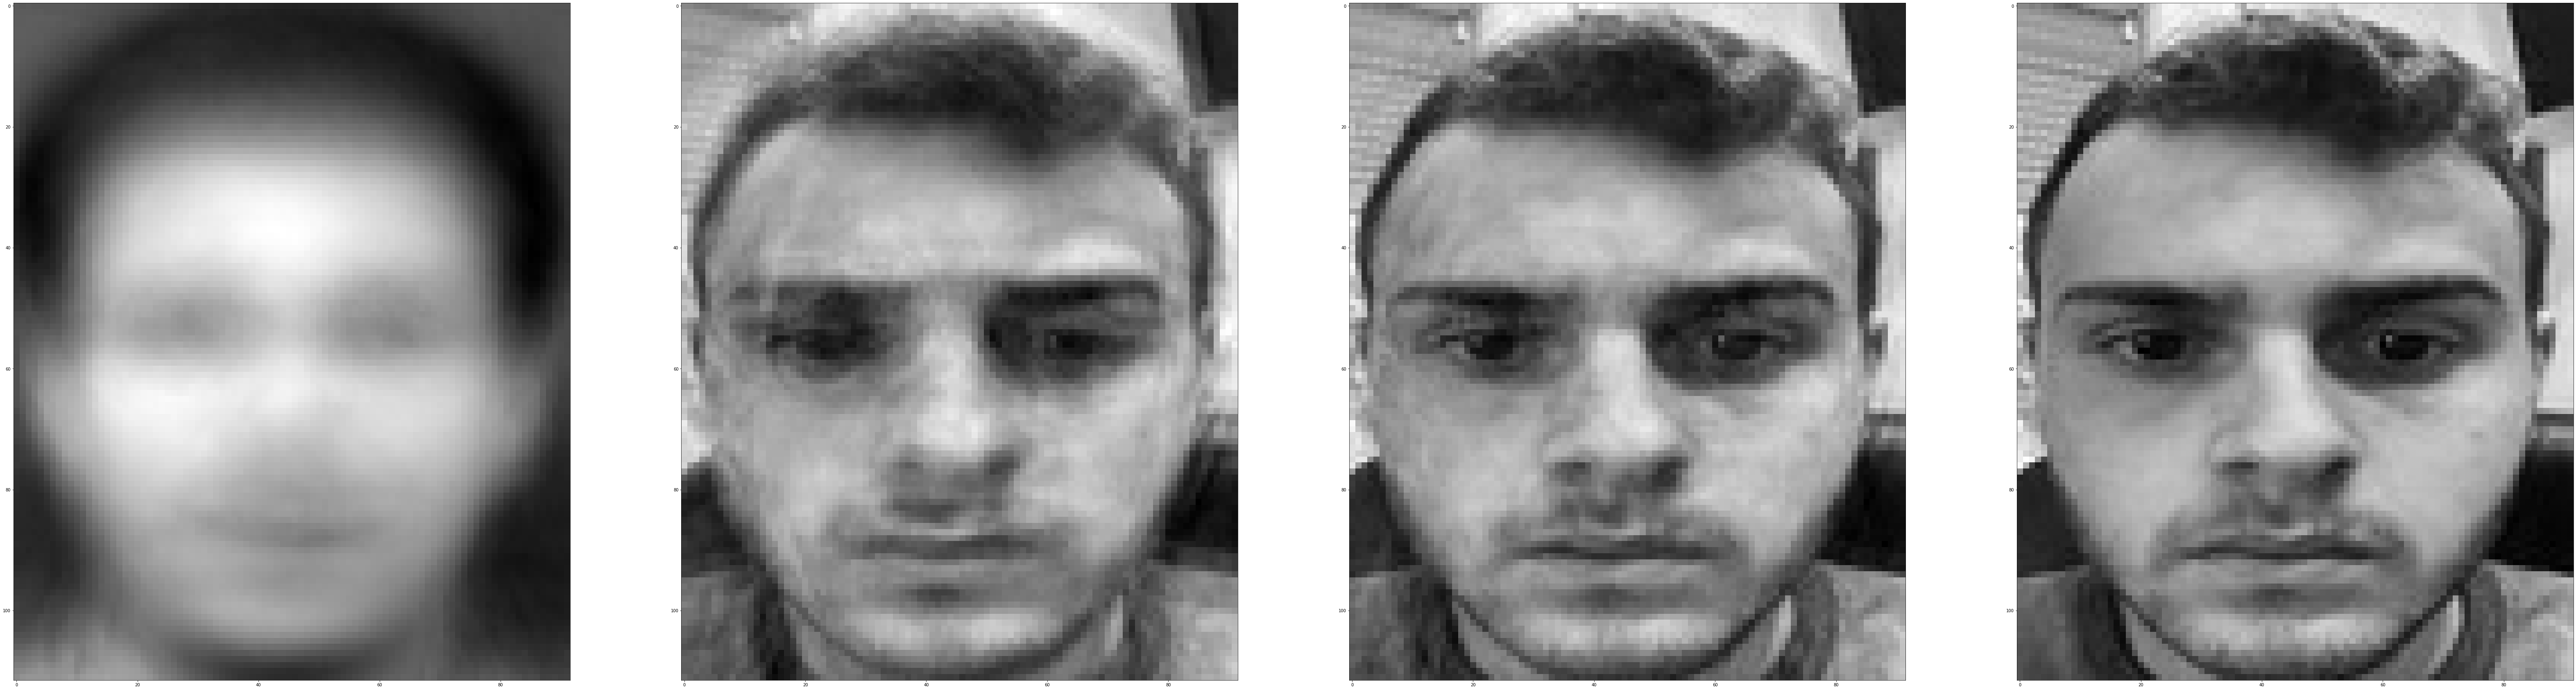

Text(0.5, 1.0, 'LOGARITHMIC')

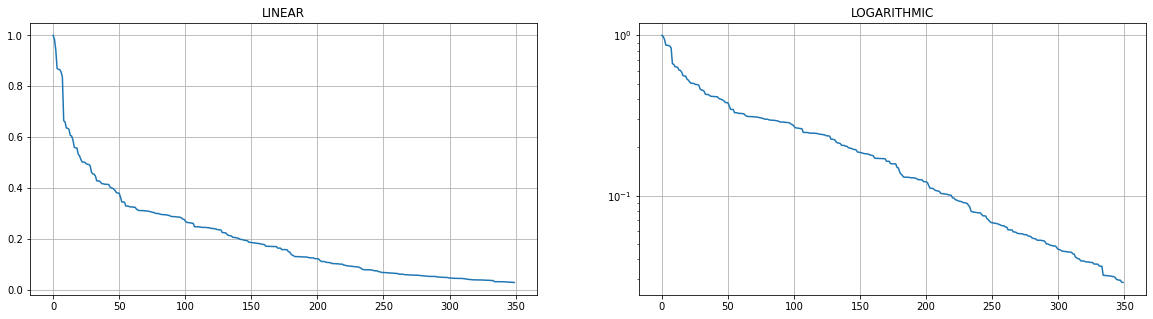

In [270]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################


# Take the first K principal components as eigenfaces
n_components = 350
eigenfaces = pca.components_[:n_components]

# Test on out-of-sample image of existing class
query = faces["s41/1.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T

current_face = pca.mean_.copy()

for i in range(n_components):
    delta =eigenfaces[i]*query_weight[i] 
    current_face += delta

# Show selected iterations with the eigenfaces
progresslist = [ 1, 100, 200, n_components-1]

fig, axes = plt.subplots(1, len(progresslist), figsize=(faceshape))

# Start constructing the target face by adding the eigenfaces with their respective weights
current_face = pca.mean_.copy()
j = 0
mse = []
queryT = query.T.reshape((query.shape[1],))
for i in range(n_components):
    delta =eigenfaces[i]*query_weight[i]
    if i in progresslist:
        axes[j].imshow(current_face.reshape(faceshape), cmap="gray")
        j += 1
    #mse calculation   
    length =queryT.shape[0]     
    mse_i =np.sqrt(np.sum(np.square(current_face-queryT))) / length      
    mse.append(mse_i)

    current_face += delta

plt.show()


# Show the error as a function of no. of elements in the PCA used so far
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

axes[0].plot(mse/mse[0])
axes[0].grid()
axes[0].set_title("LINEAR")
axes[1].semilogy(mse/mse[0])
axes[1].grid()
axes[1].set_title("LOGARITHMIC")

###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

### 3.3 morphing
Write a function that receives two images and displays a morphing process from the first image to the second by gradually changing the PCA weights of the first image, to the PCA weights of the second image. Do the process twice:

1. Morph between face "s7/1.pgm" and face "s7/4.pgm" in the database
1. Morph between two new face images you added at the begining of this question.

In [271]:
def morph(im1, im2):
    '''
    Receives two images and shows a graduae morphng from im1 to im2.
    :param im1: the source image.
    :param im2: the target image.
    
    Note: This funtion prints the iamges as it morph between them and return no value.
    '''
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    no_of_iterations  = 6

    fig, axes = plt.subplots(2, no_of_iterations, figsize=(faceshape))

    start_face = faces[im1].reshape(1,-1)   
    axes[0][2].imshow(start_face.reshape(faceshape), cmap="gray")

    end_face = faces[im2].reshape(1,-1)   
    axes[0][3].imshow(end_face.reshape(faceshape), cmap="gray")

    # Add here whatever is needed to initialise the morphing from start_image to end_image
    start_weights = eigenfaces@ (start_face - pca.mean_).T
    end_weights = eigenfaces@ (end_face - pca.mean_).T

    # Here you will calculate 'no_of_iterations' images that gradually shift from student1 image to student2
    for j in range(0,no_of_iterations):

        # Add lines as needed here
        current_face = pca.mean_.copy()
        weights = ((no_of_iterations-1-j)/no_of_iterations * start_weights) + (j/(no_of_iterations-1) * end_weights)  
        for i in range(n_components):
            # Write here whatever is needed to do the morphing between the two faces
            delta =eigenfaces[i]*weights[i]
            current_face += delta

        # This line displays the morphing for each j
        axes[1][j].imshow(current_face.reshape(faceshape), cmap="gray")


    plt.show()
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

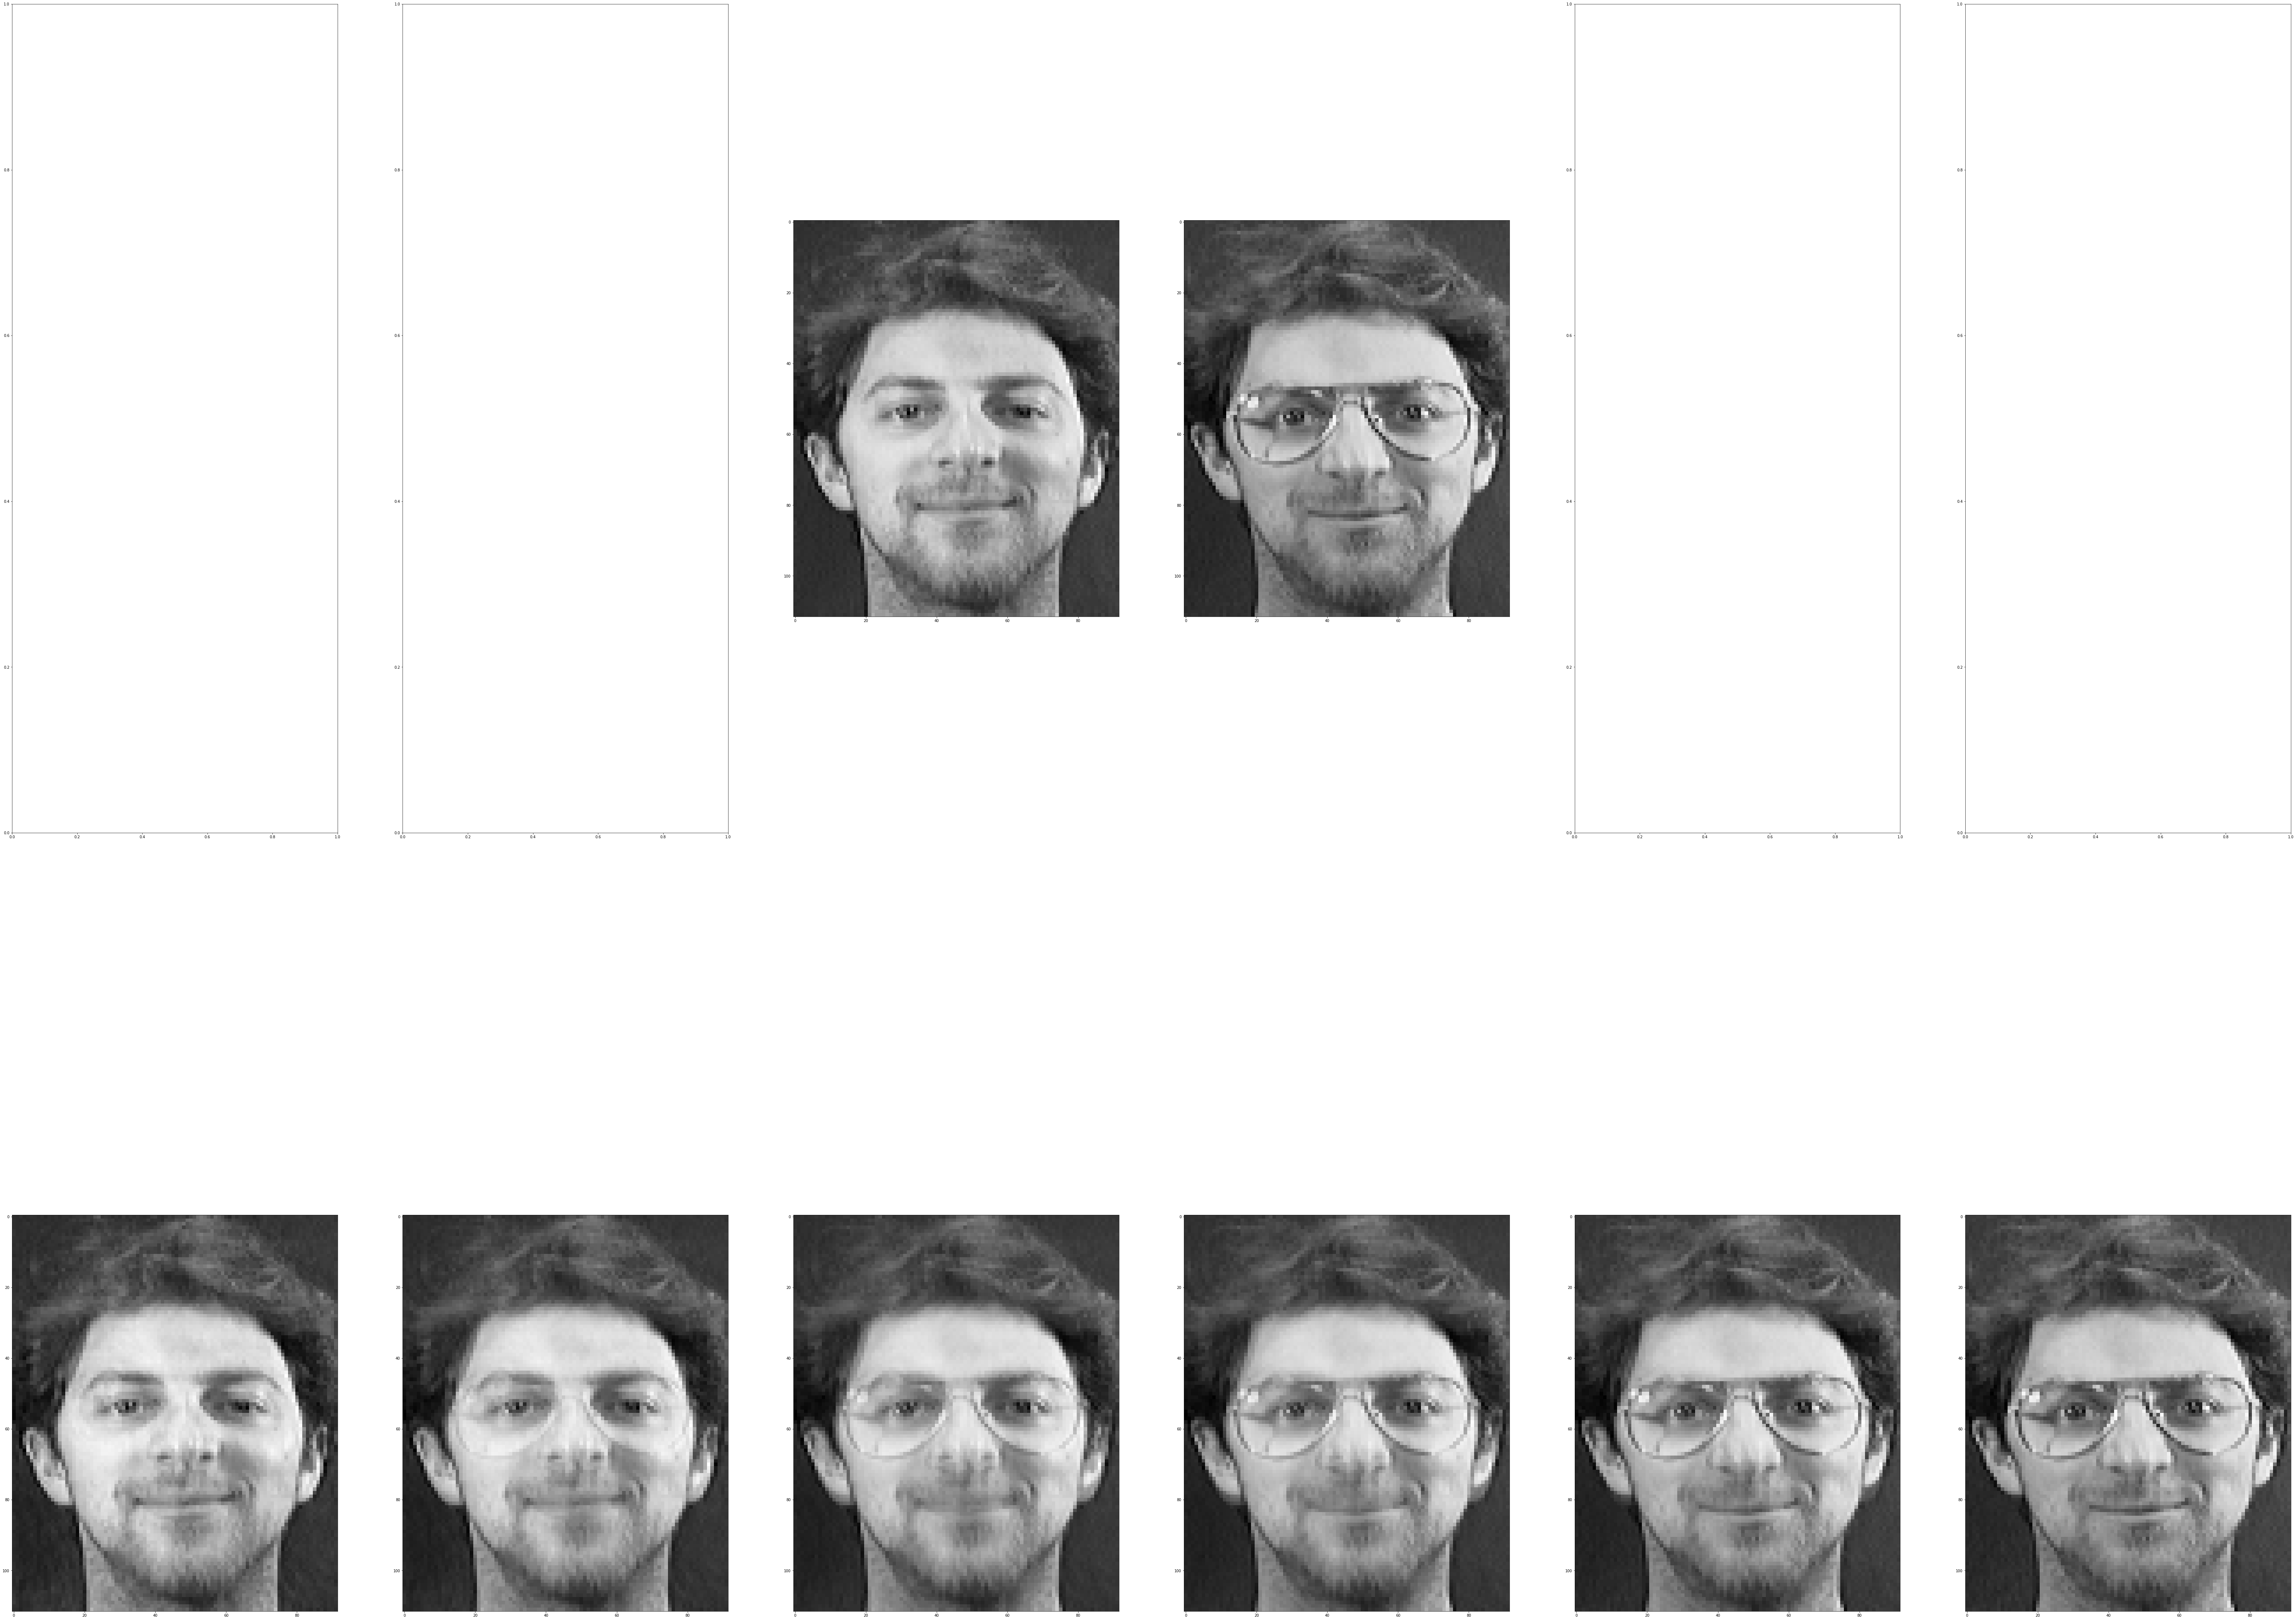

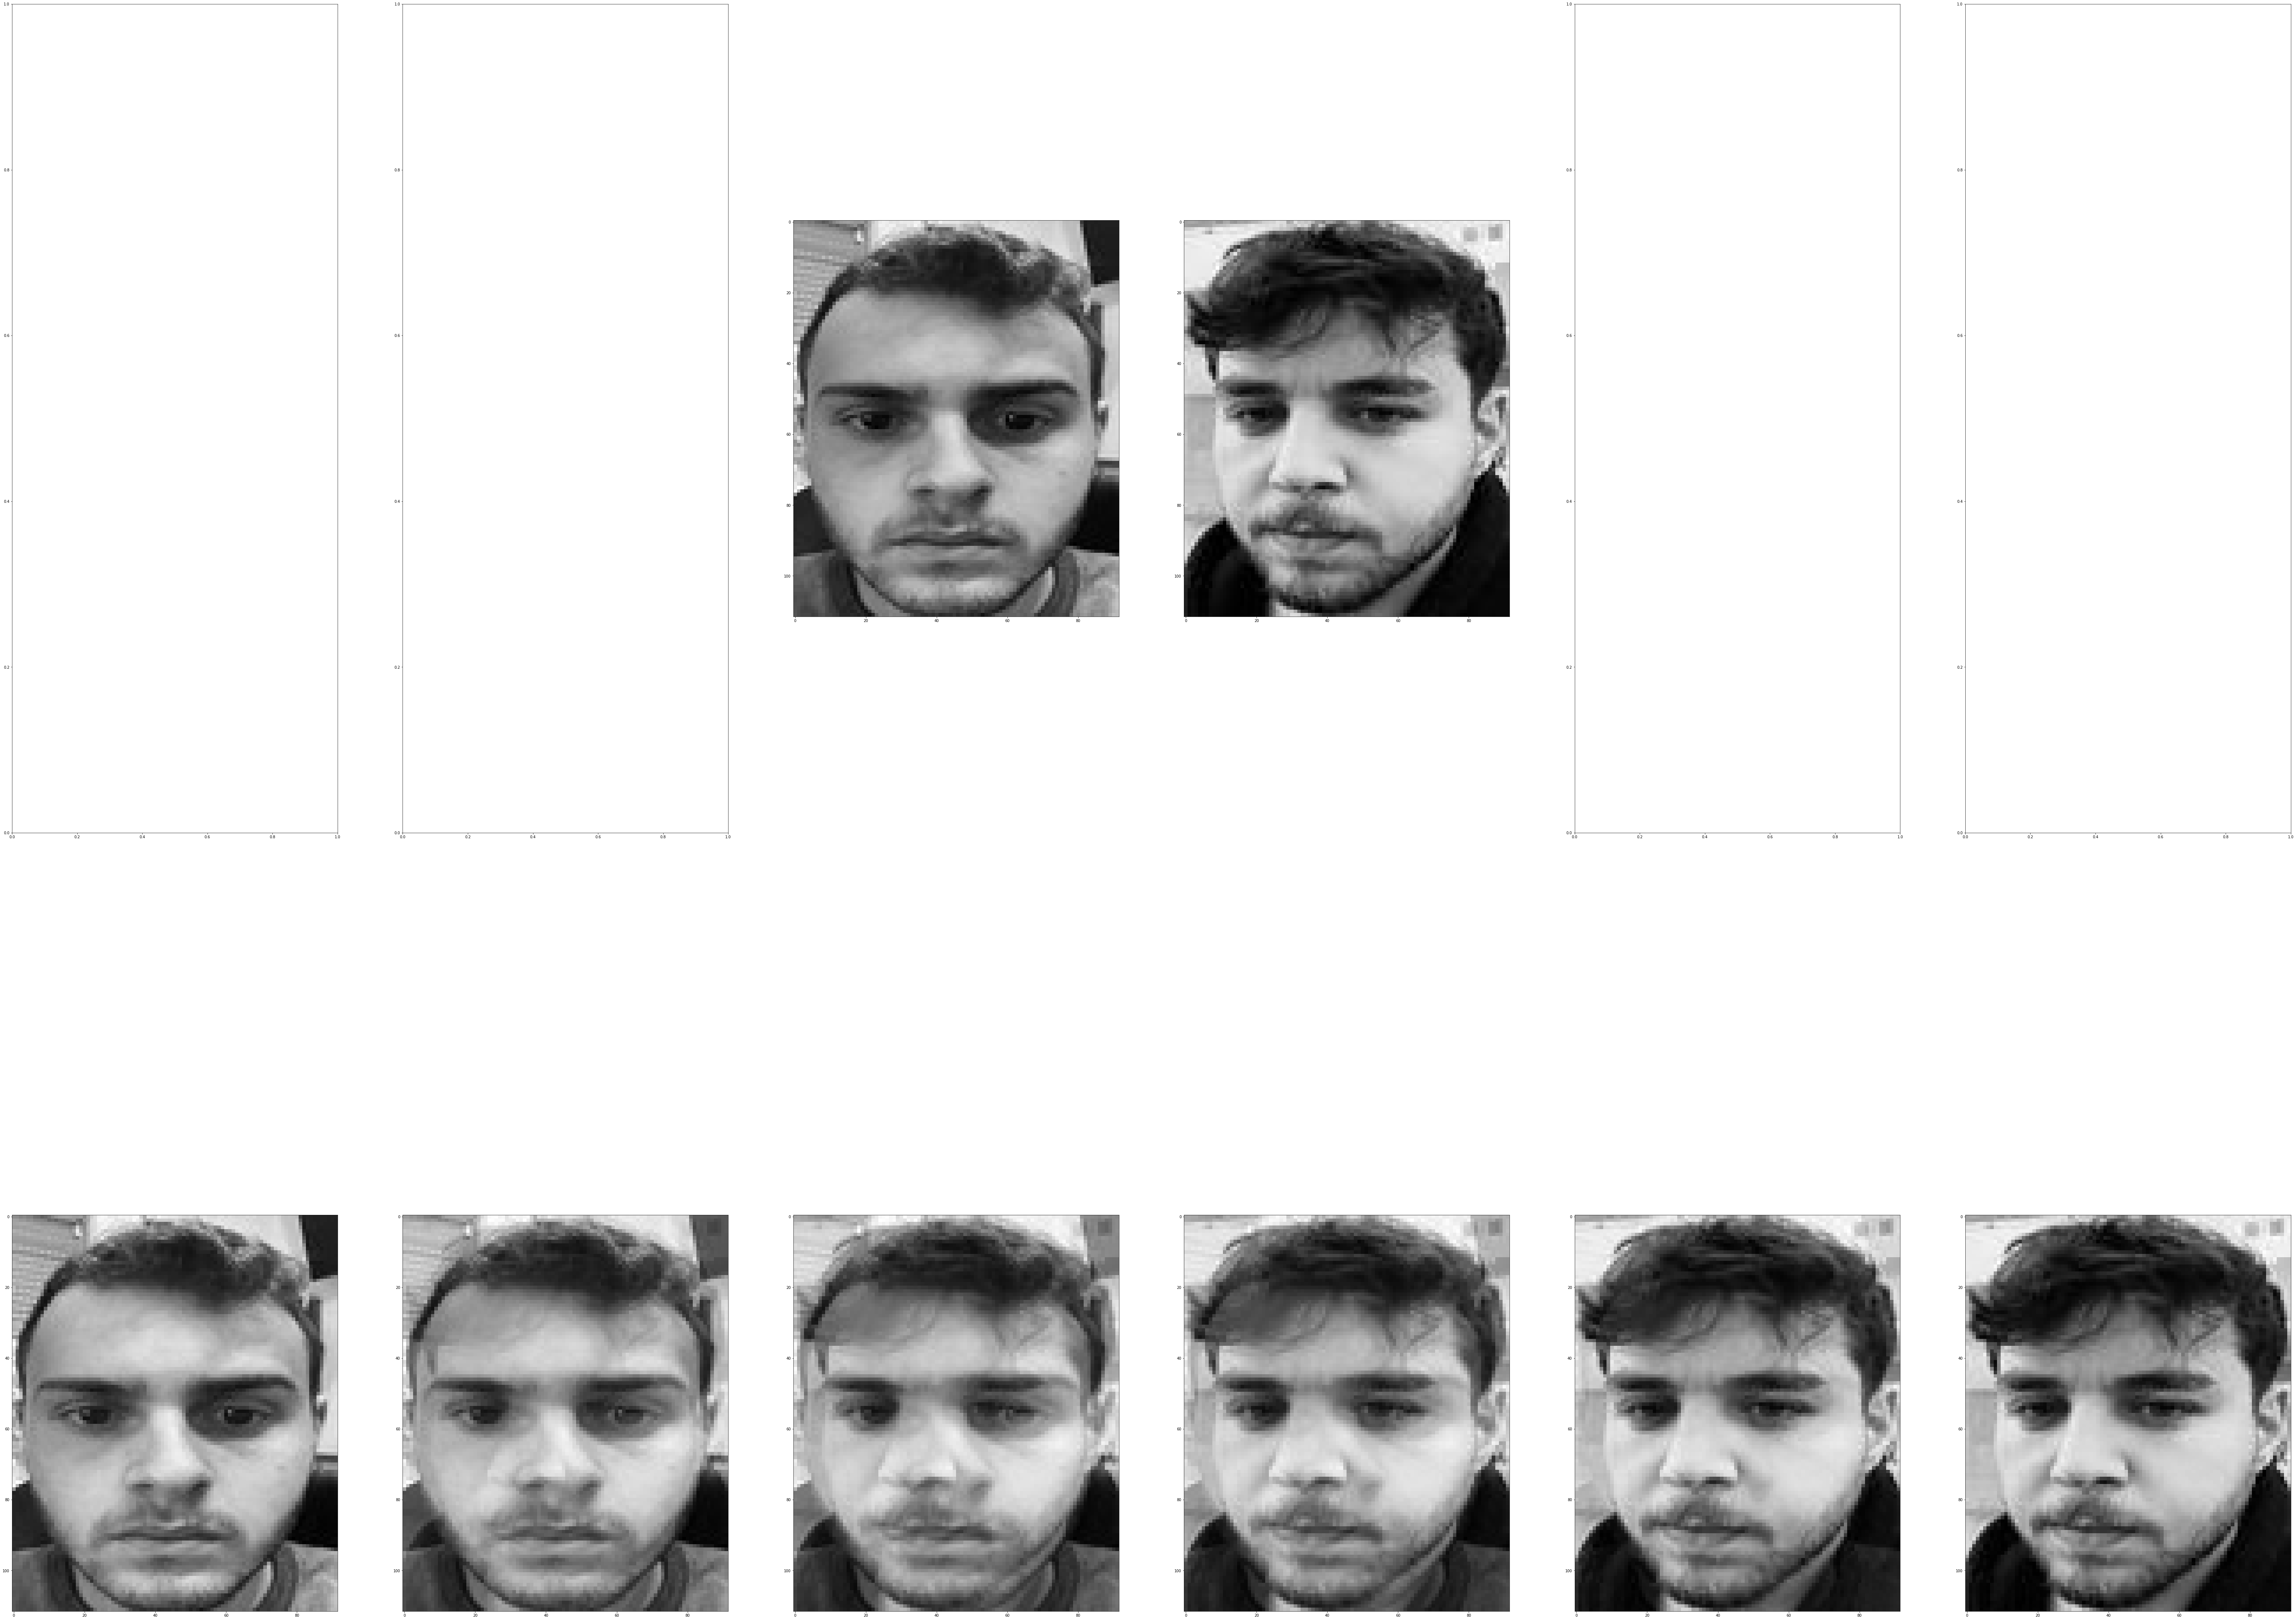

In [272]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################
morph("s7/1.pgm", "s7/4.pgm")  # 3.3.1
morph("s41/1.pgm", "s42/2.pgm") #3.3.2
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################